## A Project About Meta-Heuristic Algorithms

For an academic project!

I used this scraper to extract data from Google Scholar:\
https://github.com/sheikhartin/google-scholar-scraper

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('./datasets/metaheuristic_algorithms_since_2005.csv')
df.sample(10)

,title,authors,year,source,paper,citations no.
674,Efficiency improvements in meta-heuristic algo...,"SS Reddy, PR Bijwe",2016.0,https://www.sciencedirect.com/science/article/...,NaN,84.0
643,Parameter tuning with Chess Rating System (CRS...,"N Veček, M Mernik, B Filipič, M Črepinšek",2016.0,https://www.sciencedirect.com/science/article/...,NaN,92.0
453,A hybrid artificial grasshopper optimization (...,"BP Dahiya, S Rani, P Singh",2019.0,https://search.proquest.com/openview/76b3b1150...,NaN,11.0
895,A novel meta-heuristic optimization methodolog...,"M Fesanghary, MM Ardehali",2009.0,https://www.sciencedirect.com/science/article/...,https://www.academia.edu/download/32188860/1-s...,149.0
738,A meta-heuristic approach for image segmentati...,"B Vishwakarma, A Yerpude",2014.0,https://www.academia.edu/download/34668486/IJC...,https://www.academia.edu/download/34668486/IJC...,8.0
18,Health monitoring of pressurized pipelines by ...,"A Jahan, M Mollazadeh, A Akbarpour…",2023.0,https://koreascience.kr/article/JAKO2023226432...,NaN,NaN
682,Optimal solution to the vehicle routing proble...,"SH Kim, SH Bae",2016.0,https://www.tandfonline.com/doi/abs/10.1080/03...,NaN,3.0
140,Statistical Analysis and Comparison of the Per...,"M Rohani, H Farsi, SH Zahiri",2022.0,https://rimag.ricest.ac.ir/en/Article/16067/ri...,https://rimag.ricest.ac.ir/en/Article/16067/ri...,NaN
302,A novel meta-heuristic search algorithm for so...,"M Braik, A Sheta, H Al-Hiary",2021.0,https://link.springer.com/article/10.1007/s005...,https://www.researchgate.net/profile/Malik-Bra...,123.0
571,An adaptive meta-heuristic search for the inte...,"M Ebrahimi, E ShafieiBavani, RK Wong, S Fong…",2017.0,https://www.sciencedirect.com/science/article/...,NaN,44.0


### Top publishers 

In [6]:
top_publishers = (
    df['source']
    .str.extract(r'(?:https?://)?(?:www\.)?((?:\w+\.)*\w+)/')
    .value_counts()
    .head(10)
)
top_publishers

sciencedirect.com          252
link.springer.com          206
ieeexplore.ieee.org        104
tandfonline.com             39
mdpi.com                    32
researchgate.net            20
inderscienceonline.com      19
onlinelibrary.wiley.com     18
academia.edu                13
global.com                  12
Name: count, dtype: int64

In [7]:
top_publishers.index = [i[0].split('.')[-2] for i in top_publishers.index]

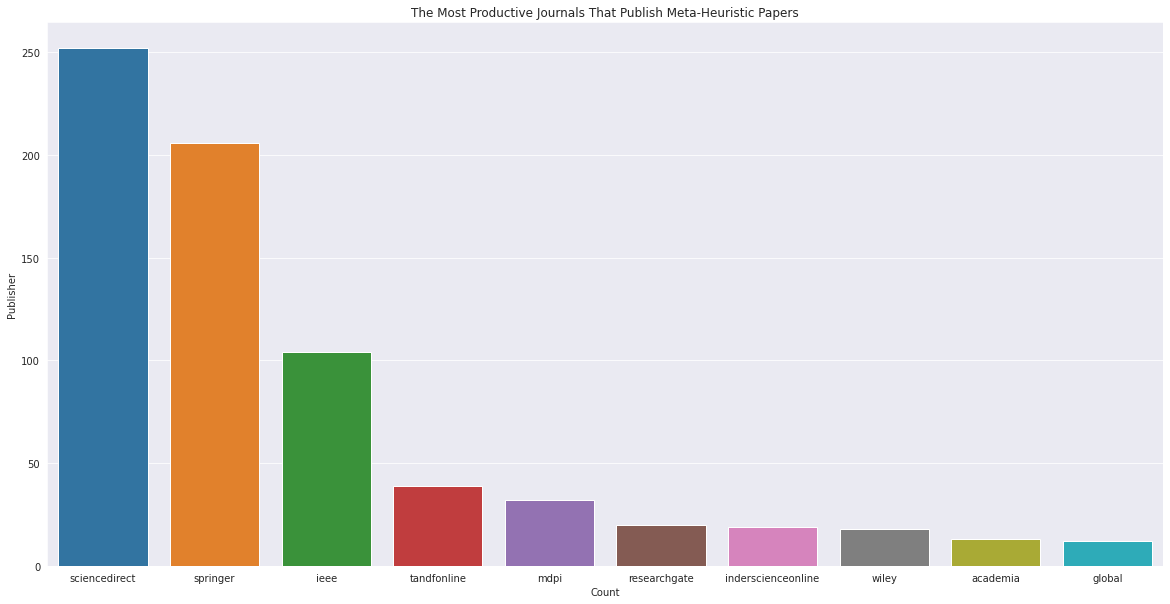

In [8]:
plt.figure(figsize=(20, 10))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('The Most Productive Journals That Publish Meta-Heuristic Papers')
plt.show()

### Hot topics

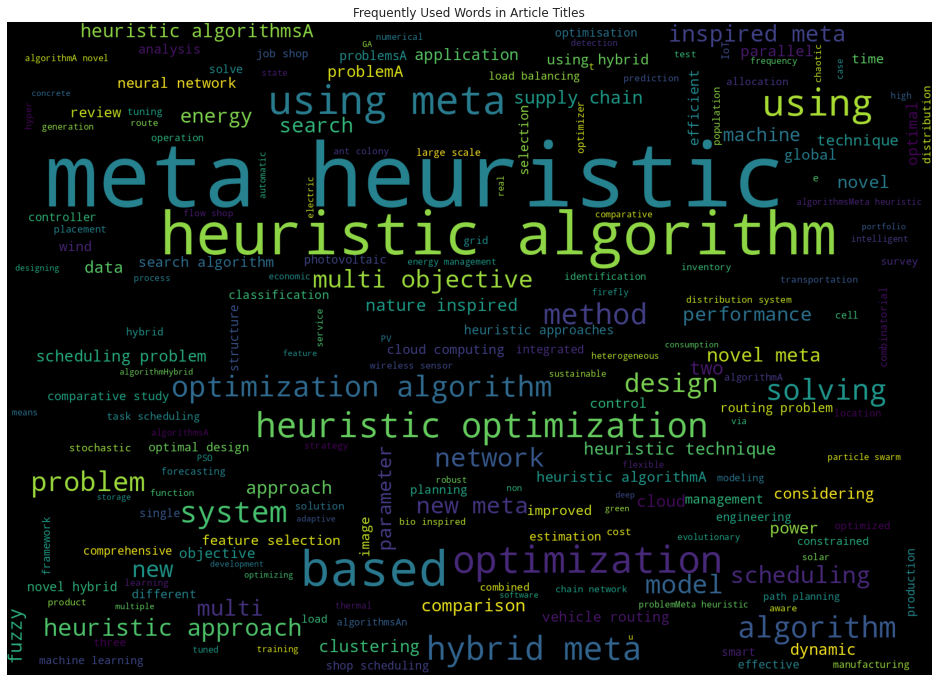

In [9]:
plt.figure(figsize=(17, 12))
wordcloud = (
    WordCloud(stopwords=STOPWORDS, width=1700, height=1200, background_color='black')
    .generate(df['title'].sum())
)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Frequently Used Words in Article Titles')
plt.show()

### The most popular papers

In [10]:
popular_papers = (
    df
    .sort_values(by=['citations no.'], ascending=False)
    .head(10)
    [['title', 'authors', 'year', 'citations no.']]
)
popular_papers

,title,authors,year,citations no.
646,Dragonfly algorithm: a new meta-heuristic opti...,S Mirjalili,2016.0,2408.0
930,A new meta-heuristic algorithm for continuous ...,"KS Lee, ZW Geem",2005.0,2344.0
926,Shuffled frog-leaping algorithm: a memetic met...,"M Eusuff, K Lansey, F Pasha",2006.0,1418.0
309,Aquila optimizer: a novel meta-heuristic optim...,"L Abualigah, D Yousri, M Abd Elaziz, AA Ewees…",2021.0,1237.0
821,A new meta-heuristic method: ray optimization,"A Kaveh, M Khayatazad",2012.0,809.0
85,Reptile Search Algorithm (RSA): A nature-inspi...,"L Abualigah, M Abd Elaziz, P Sumari, ZW Geem…",2022.0,684.0
769,Colliding bodies optimization: a novel meta-he...,"A Kaveh, VR Mahdavi",2014.0,670.0
750,Advances in metaheuristic algorithms for optim...,A Kaveh,2014.0,588.0
777,A review of population-based meta-heuristic al...,"Z Beheshti, SMH Shamsuddin",2013.0,530.0
358,Black widow optimization algorithm: a novel me...,"V Hayyolalam, AAP Kazem",2020.0,512.0


In [11]:
titles = (
    popular_papers['title']
    .str.split(':')
    .str[0]
)
titles

646                                  Dragonfly algorithm
930    A new meta-heuristic algorithm for continuous ...
926                      Shuffled frog-leaping algorithm
309                                     Aquila optimizer
821                          A new meta-heuristic method
85                        Reptile Search Algorithm (RSA)
769                        Colliding bodies optimization
750    Advances in metaheuristic algorithms for optim...
777    A review of population-based meta-heuristic al...
358                   Black widow optimization algorithm
Name: title, dtype: object

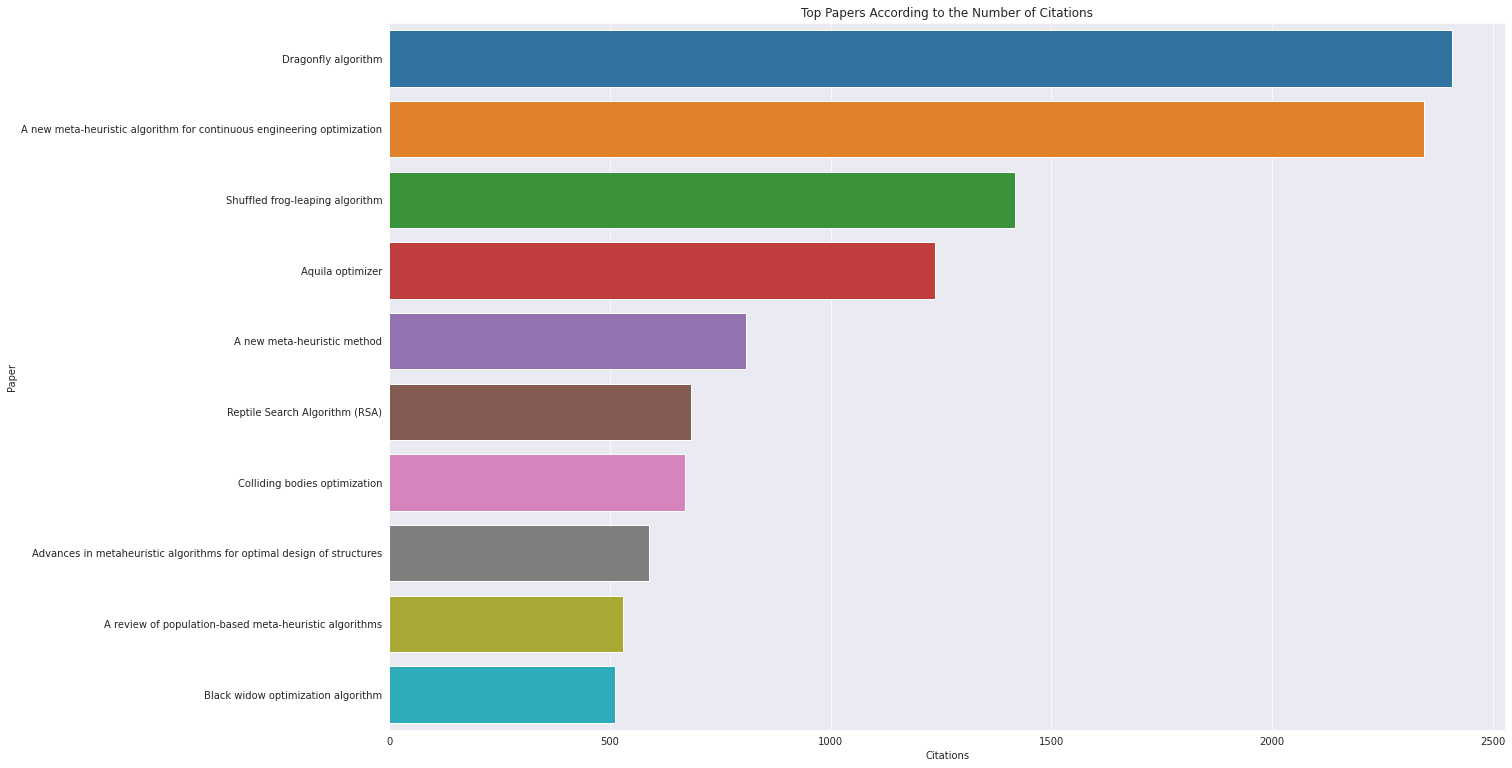

In [36]:
plt.figure(figsize=(20, 13))
sns.barplot(x=popular_papers['citations no.'], y=titles)
plt.xlabel('Citations')
plt.ylabel('Paper')
plt.title('Top Papers According to the Number of Citations')
plt.show()

### The brightest years

In [17]:
prolific_years = (
    df['year']
    .value_counts()
    .head(10)
)
prolific_years

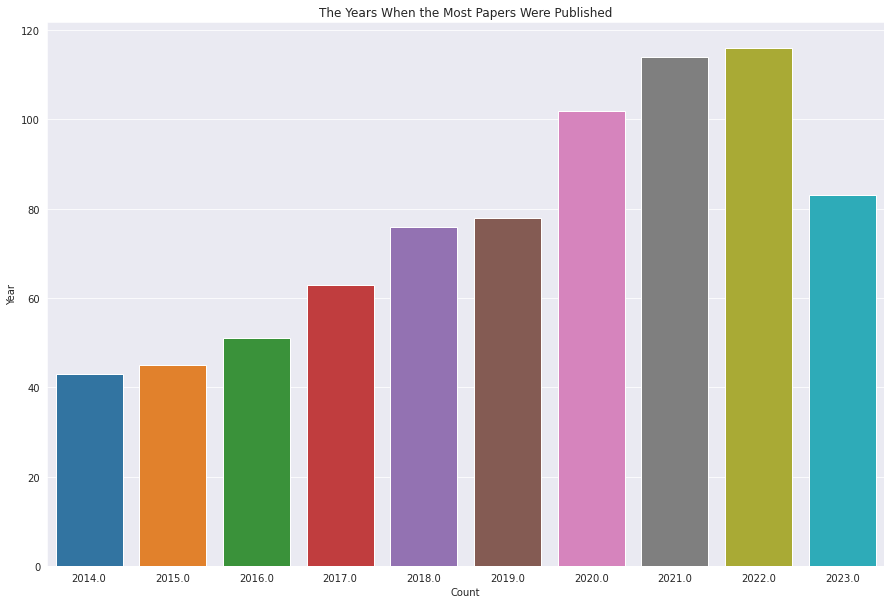

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x=prolific_years.index, y=prolific_years.values)
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('The Years When the Most Papers Were Published')
plt.show()

### The most active authors

In [25]:
prolific_authors = (
    df['authors']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)
prolific_authors

authors
A Kaveh                   31
R Tavakkoli-Moghaddam…     9
S Mirjalili                7
J Wang                     6
L Abualigah                6
A Abraham                  6
P Korošec                  5
SM Mousavi                 5
STA Niaki                  5
X Liu                      5
Name: count, dtype: int64

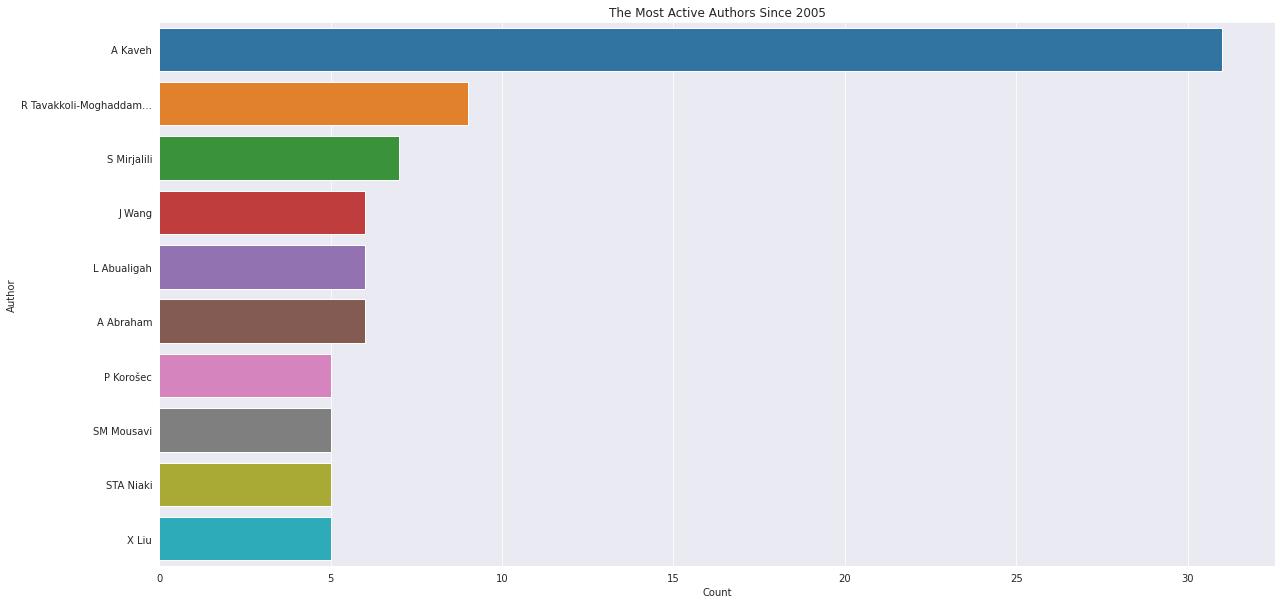

In [35]:
plt.figure(figsize=(20, 10))
sns.barplot(x=prolific_authors.values, y=prolific_authors.index)
plt.xlabel('Count')
plt.ylabel('Author')
plt.title('The Most Active Authors Since 2005')
plt.show()